In [1]:
import pandas as pd
import numpy as np
import os
import re
import warnings
import pickle
import os.path
import seaborn
import pickle
import os.path
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import jieba


mpl.rcParams.update({'font.size': 30})

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']

import seaborn as sns
#sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
#plt.style.use('ggplot')
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
%matplotlib inline

In [2]:
# 读取数据
#读取数据
if os.path.exists('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id'):
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
else:
    os.mkdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
    os.chdir('/home/zhh/文档/阿里巴巴/data/3.分析train和train_id')
with open('train_analysis_1.pickle','rb') as f1:
    data = pickle.load(f1) 

In [3]:
# 提取出院病种名称
diease_name = data[['个人编码','出院诊断病种名称','标签']].drop_duplicates()

In [4]:
np.sum(diease_name.isnull())/diease_name.shape[0]

个人编码        0.000000
出院诊断病种名称    0.156836
标签          0.000000
dtype: float64

In [8]:
#将空值类命名为空值类
diease_name['出院诊断病种名称'] = diease_name['出院诊断病种名称'].fillna('空值')
diease_text = ' '.join(diease_name['出院诊断病种名称'])

In [31]:
with open('/home/zhh/文档/阿里巴巴/出院病种名称.txt','w') as f1:
    f1.write(diease_text)

In [6]:
#导入结巴的分析类，提取语句中的关键字，取Top100
import jieba.analyse
tags = jieba.analyse.extract_tags(diease_text, topK=100)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.798 seconds.
Prefix dict has been built succesfully.


In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
wc= WordCloud(font_path='/home/zhh/下载/SimHei.ttf',width=1200,height=1000, margin=2) #制作词云
my_wordcloud=wc.generate(' '.join(tags).encode('utf-8').decode('utf-8'))

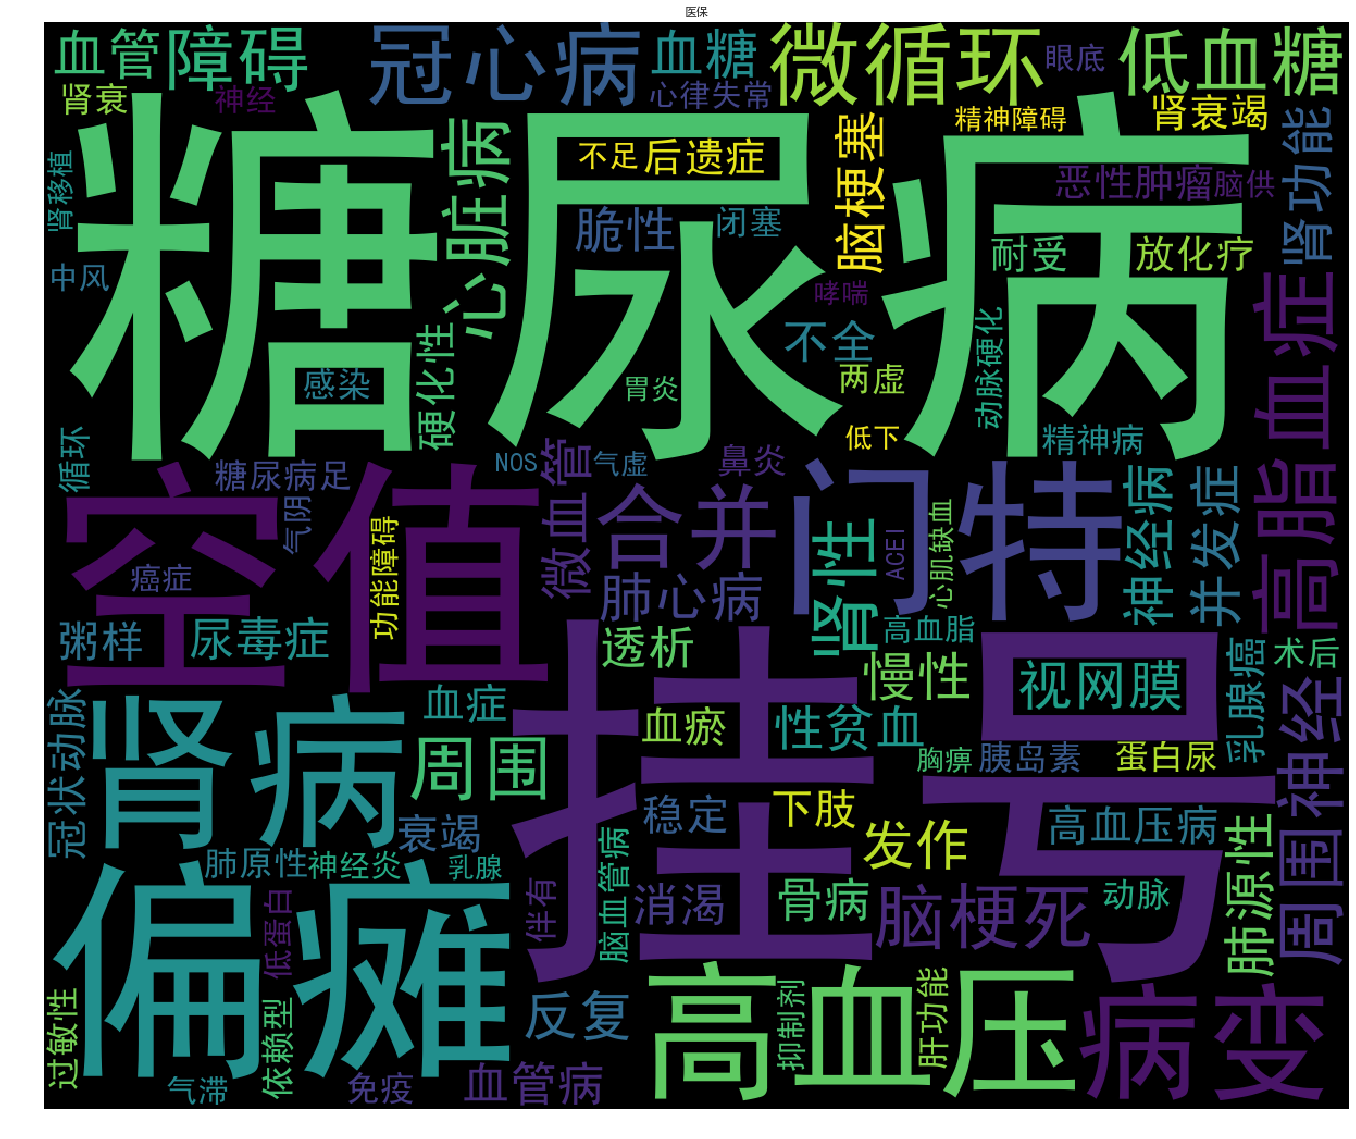

In [9]:
plt.figure(figsize=(30,20))
plt.title('医保')
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

# 查看骗保人的词云图

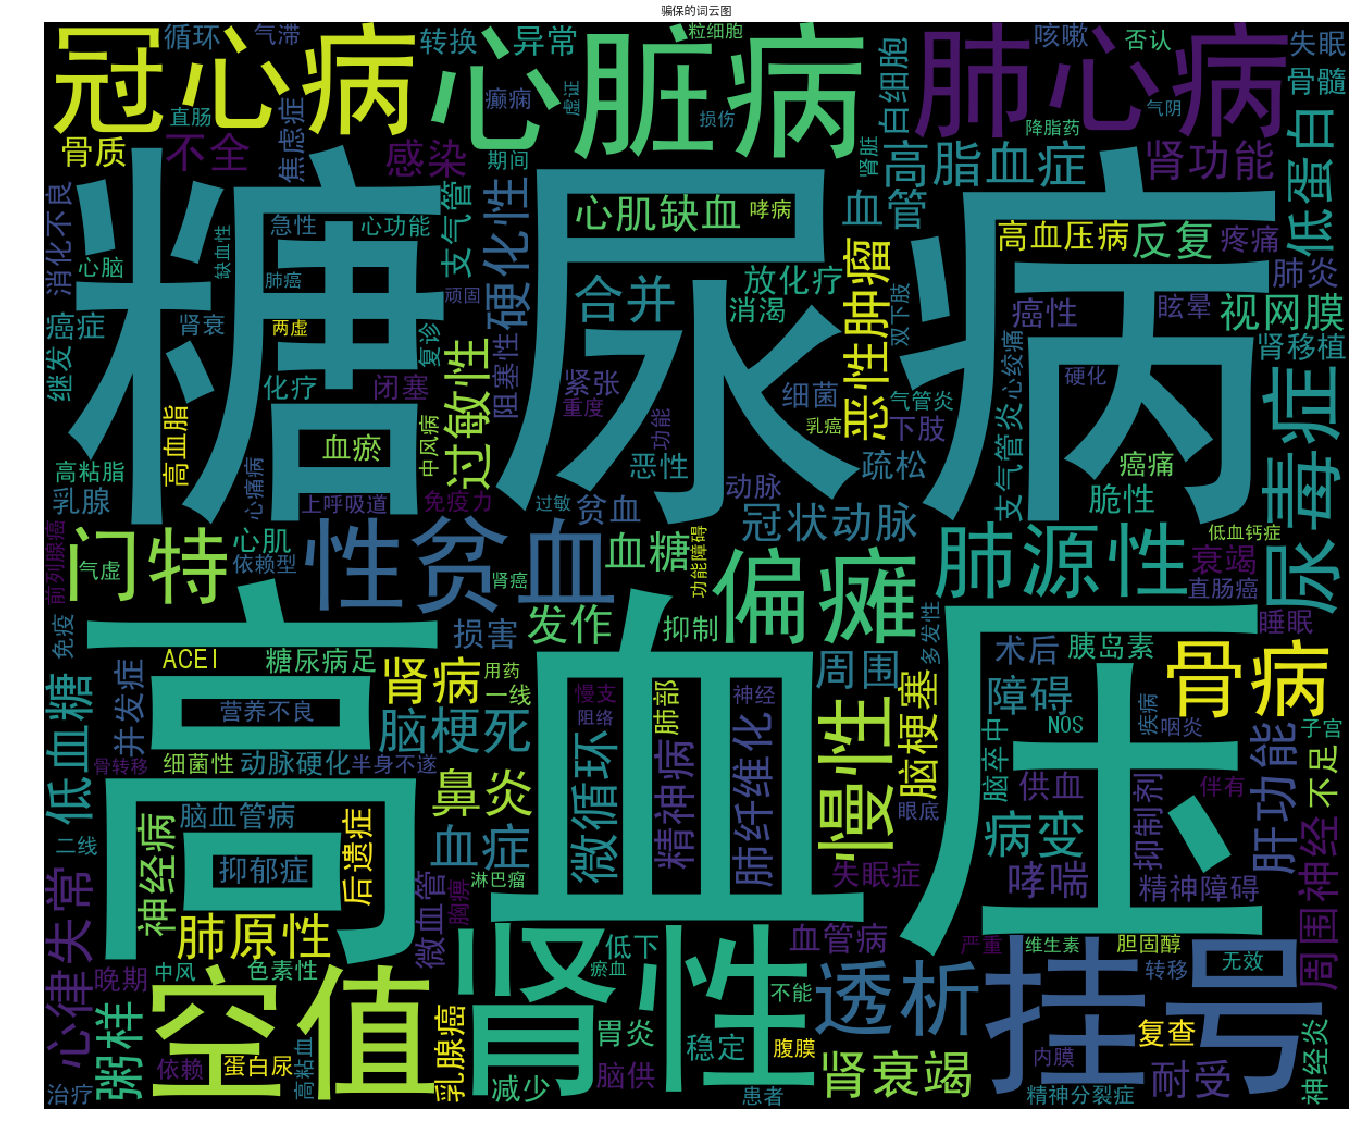

In [10]:
diease_text_1 = ' '.join(diease_name[diease_name['标签']==1]['出院诊断病种名称'])
tags_1 = jieba.analyse.extract_tags(diease_text_1, topK=500)
wc1= WordCloud(font_path='/home/zhh/下载/SimHei.ttf',width=1200,height=1000, margin=2) #制作词云
my_wordcloud1=wc1.generate(' '.join(tags_1).encode('utf-8').decode('utf-8'))
plt.figure(figsize=(30,20))
plt.title('骗保的词云图')
plt.imshow(my_wordcloud1)
plt.axis("off")
plt.show()

# 非骗保人士的词云图

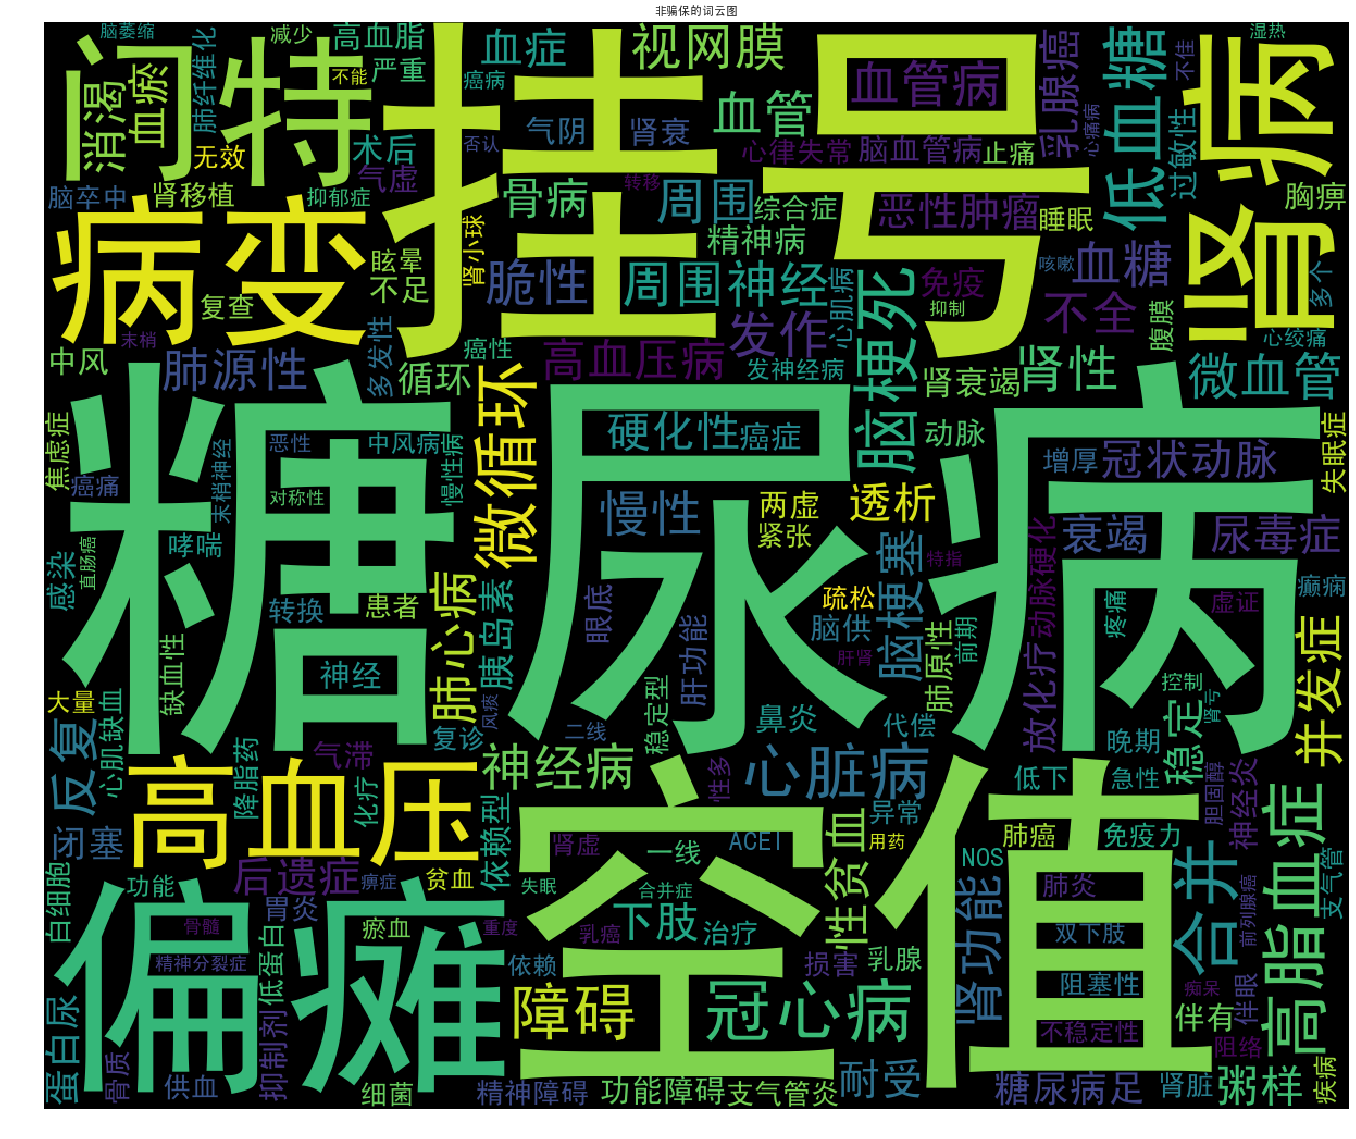

In [11]:
diease_text_0 = ' '.join(diease_name[diease_name['标签']==0]['出院诊断病种名称'])
tags_0 = jieba.analyse.extract_tags(diease_text_0, topK=500)
wc0= WordCloud(font_path='/home/zhh/下载/SimHei.ttf',width=1200,height=1000, margin=2) #制作词云
my_wordcloud0=wc0.generate(' '.join(tags_0).encode('utf-8').decode('utf-8'))
plt.figure(figsize=(30,20))
plt.title('非骗保的词云图')
plt.imshow(my_wordcloud0)
plt.axis("off")
plt.show()

In [12]:
# 替换使wbc变成白细胞，ca变成癌症
diease_text1 = diease_text.replace('WBC','白血球')
diease_text1 = diease_text1.replace('Ca','癌症')

In [13]:
diease_name['出院诊断病种名称'].head(10).str.split(";")

0                                               [挂号]
1                                               [挂号]
2                                               [挂号]
3                                               [挂号]
4                                               [挂号]
5                                               [挂号]
6    [尿毒症, 肾性贫血, 肾性高血压, 失眠, 肾性骨病, 肝功能异常, 低蛋白血症, 肾透析]
7                                               [挂号]
8                                              [肾透析]
9                                               [挂号]
Name: 出院诊断病种名称, dtype: object

# 用来检测语义不清的词

In [14]:
def split_comma(columns):
        a = re.split(r'[,，;；、 ]',columns)
        a = list(set(a))
        if '' in a:
            a.remove('')
        return a
b=[]
for i in diease_name['出院诊断病种名称']:
    a = split_comma(i)
    b.extend(a)
b = list(set(b))

In [15]:
#检测周带有“周围”两个字的病种名称
zhouwei = []
for i in b:
    if "粥样" in i:
        zhouwei.append(i)
zhouwei = list(set(zhouwei))
zhouwei

['冠状动脉粥样硬化性心脏病',
 '下肢动脉粥样硬化',
 '冠状动脉粥样硬化性心脏病脑梗塞偏瘫',
 '[新]冠状动脉粥样硬化性心脏病高血脂症偏瘫',
 '2型糖尿病性周围神经病变糖尿病下肢动脉粥样硬化闭塞症',
 '冠状动脉粥样',
 '糖尿病糖尿病性末梢对称性周围神经病变下肢动脉粥样硬化闭塞症',
 '动脉粥样硬化肺源性心脏病心肌供血不足',
 '慢性肺源性心脏病@高血压Ⅲ级@冠状动脉粥样硬化性心脏病',
 '急性肺源性心脏病冠状动脉粥样硬化性心脏病高血压脑血管供血不足',
 '糖尿病糖尿病性大量白蛋白尿性肾病下肢动脉粥样硬化闭塞症',
 '2型糖尿病伴多个并发症@冠状动脉粥样硬化性心脏病@糖尿病性肾病@糖尿病周围神经病变',
 '冠状动脉粥样硬化',
 '2型糖尿病冠状动脉粥样硬化性心脏病2型糖尿病性周围神经病变糖尿病性前期肾病',
 '动脉粥样硬化高血压偏瘫',
 '偏瘫脑血管供血不足稳定性心绞痛冠状动脉粥样硬化性心脏病原发性高血压高粘血症脑梗死后遗症',
 '糖尿病糖尿病性视网膜增厚性视网膜病下肢动脉粥样硬化闭塞症',
 '糖尿病糖尿病合并下肢微血管病变糖尿病性末梢对称性周围神经病变下肢动脉粥样硬化闭塞症',
 '动脉粥样硬化肺源性心脏病高血压高粘血症',
 '动脉粥样硬化肺源性心脏病维生素缺乏症消化不良',
 '[新]冠状动脉粥样硬化性心脏病肺源性心脏病高粘血症',
 '动脉粥样硬化肺源性心脏病高血压冠心病心律失常型',
 '偏瘫脑血管供血不足稳定性心绞痛原发性高血压冠状动脉粥样硬化性心脏病高粘血症脑梗死后遗症',
 '[新]冠状动脉粥样硬化性心脏病对血管紧张素转换酶抑制剂不能耐受高血压偏瘫',
 '偏瘫高脂血症冠状动脉粥样硬化性心脏病骨关节病脑梗死',
 '[新]冠状动脉粥样硬化性心脏病高脂血症偏瘫',
 '冠状动脉粥样硬化性心脏病血瘀证',
 '高血压冠状动脉粥样硬化性心脏病',
 '冠状动脉粥样硬化性心脏病脑梗死后遗症偏瘫',
 '肺源性心脏病高血压冠状动脉粥样硬化性心脏病心动过速',
 '偏瘫冠状动脉粥样硬化性心脏病骨关节病脑梗死',
 '动脉粥样硬化肺源性心脏病冠心病心律失常型心律失常',
 '高血压冠状动脉粥样硬化性心脏病偏瘫',
 '[新]冠状动脉粥样硬化性心脏病肺源性心脏病高血压支气管哮喘',
 '动脉粥样硬化肺源性心脏病冠心病心律失

In [459]:
for i in diease_name['出院诊断病种名称']:
    if any(word in i for word in ['肾病']):
        print(i)

糖尿病,糖尿病合并冠心病,糖尿病肾病,肾功能衰竭
糖尿病性肾病;
糖尿病,糖尿病合并冠心病,糖尿病肾病,肾功能衰竭
2型脆性糖尿病糖尿病合并肾病糖尿病合并肾免疫功能障碍糖尿病合并微循环障碍
糖尿病性冠心病 糖尿病肾病 
糖尿病性肾病;
反复发作低血糖,糖尿病,糖尿病性大量白蛋白尿性肾病
糖尿病 微血管病变 糖尿病肾病 慢性肾衰 肾虚
糖尿病.合并冠心病糖尿病.合并周围神经病变.肾病变
2型糖尿病伴多个并发症@糖尿病性肾病@糖尿病周围神经病变
2型糖尿病2型糖尿病性周围血管病2型糖尿病性周围神经病变2型糖尿病性前期肾病
糖尿病（门特）,糖尿病合并周围血管病变,糖尿病合并冠心病,糖尿病合并肾病
肾功能代谢失调糖尿病糖尿病合并肾病糖尿病合并视网膜病变糖尿病合并双下肢微循环障碍
糖尿病肾病,糖尿病眼底病变
2型糖尿病糖尿病合并肾病糖尿病合并肾免疫功能障碍糖尿病合并微血管病变
2型糖尿病,肾病,冠心病心律失常型,周围神经病,冠状动脉性心脏病,2型糖尿病性视网膜病变,糖尿病伴周围循环并发症
糖尿病（门特）,糖尿病合并肾病
糖尿病肾病,糖尿病眼底病变
糖尿病肾病（免疫功能低下，脏器衰竭）
糖尿病糖尿病肾病
糖尿病,动脉硬化性心脏病,2型糖尿病性视网膜病变,糖尿病伴神经并发症,2型糖尿病性肾病,糖尿病伴周围循环并发症
肾功能不全糖尿病糖尿病肾病
糖尿病肾病,糖尿病眼底病变
糖尿病性肾病 合并肾功能不全 
糖尿病性肾病;
糖尿病,糖尿病（门特）,糖尿病肾病合并慢性肾衰
糖尿病,糖尿病性肾病,尿浊病
糖尿病,糖尿病肾病 肾功能衰竭代偿期,糖尿病视网膜病变
糖尿病性肾病 ;冠心病 
糖尿病糖尿病肾病糖尿病微血管病变
糖尿病,糖尿病肾病 肾功能衰竭代偿期,冠心病
糖尿病肾病,糖尿病眼底病变
糖尿病,糖尿病肾病 肾功能衰竭代偿期
糖尿病,2型糖尿病性肾病,高血压病,糖尿病伴肾并发症,糖尿病伴眼并发症,消化不良
2型糖尿病2型糖尿病性周围血管病2型糖尿病性周围神经病变2型糖尿病性前期肾病
糖尿病糖尿病合并肾病
糖尿病 ;糖尿病肾病;糖尿病神经病变 
慢性肾衰竭糖尿病(门特）糖尿病合并肾病糖尿病合并微血管病变
糖尿病肾病 肾功能不全
糖尿病 肾病  周围血管病变;
2型糖尿病性胰岛素抵抗免疫功能障碍糖尿病糖尿病性前期肾病
糖尿病肾病 肾功能不全
2型糖尿病2型糖尿病性周围血管病2型糖尿病性周围神

# 现在进行将词分类

In [6]:

def convert_diease_name(name):
    diease_types = []
    
    #1挂号
    if name =='挂号':
        guahao =1
    else:
        guahao =0
        
    #2空值
    if name =='空值':
        kongzhi = 1
    else:
        kongzhi = 0
    
    #3肾病
    if any(word in name for word in ['肾','透析','蛋白尿','尿毒']):
        shenbing = 1
    else:
        shenbing =0
    
    #4门特
    if '门特' in name:
        mente = 1
    else:
        mente =0
    
    #5心血管病
    if  any(word in name for word in ['心脏','冠心','血管','粥样','动脉','粘稠'\
                                     ,'脂','血糖','心肌']):
        xinxueguan = 1
    else:
        xinxueguan = 0
        
    #6脑血管病
    if any(word in name for word in ['癫痫','偏瘫','脑','中风']):
        naoxueguan = 1
    else:
        naoxueguan = 0
        
    #7癌症
    if any(word in name for word in ['癌','肿瘤','放疗','化疗'\
                                     ,'放化疗','白血病','Ca','ca','cancer','白血病']):
        aizheng = 1
    else:
        aizheng = 0
        
    #8肺病
    if any(word in name for word in ['肺','结核']):
        feibing = 1
    else:
        feibing = 0
    
    #9糖尿病
    if any(word in name for word in ['糖尿','胰岛素']):
        tangniaobing = 1
    else:
        tangniaobing = 0
    
     #10神经病
    if any(word in name for word in ['神经']):
        shenjingbing = 1
    else:
        shenjingbing = 0
        
    #11精神病
    if  any(word in name for word in ['精神']):
        jinshenbing = 1
    else:
        jinshenbing = 0
    
    #12高血压
    if any(word in name for word in ['高血压']):
        gaoxueya = 1
    else:
        gaoxueya = 0
    
    
    #13病变
    if '病变' in name:
        bingbian = 1
    else:
         bingbian = 0 
            
    
    #14偏瘫
    if any(word in name for word in ['偏瘫']):
        piantan = 1
    else:
        piantan = 0 
    
    #心脏
    if any(word in name for word in ['心脏','冠心','肺心']):
        xinzangbing = 1
    else:
        xinzangbing = 0
   
    
     #肺心病
    if any(word in name for word in ['肺心']):
        feixinbing = 1
    else:
        feixinbing = 0
        
    #肾性
    if any(word in name for word in ['肾性']):
        shenxin = 1
    else:
        shenxin = 0
        
    #合并
    if any(word in name for word in ['合并']):
        hebing = 1
    else:
        hebing = 0
        
    #肾病1
    if any(word in name for word in ['肾病']):
        shenbing1 = 1
    else:
        shenbing1 =0
    
    
    #15其他
    qita_list =['挂号','空值','肾','透析','蛋白尿','尿毒','门特'\
               ,'心脏','冠心','血管','粥样','动脉','粘稠','脂','血糖'\
               ,'癫痫','偏瘫','脑','中风','癌','肿瘤','放疗','化疗'\
                ,'放化疗','白血病','Ca','ca','cancer','白血病','肺','结核',\
               '糖尿','胰岛素','神经','精神','高血压','偏瘫','心脏','冠心','肺心','心肌','肾性','合并','肾病']
    
    if all(word not in i for word in qita_list):
        qita = 1
    else:
        qita =0
        
    diease_types.append([guahao,kongzhi,shenbing, mente,xinxueguan,naoxueguan,\
                         aizheng,feibing,tangniaobing,shenjingbing,jinshenbing,gaoxueya,\
                       bingbian,piantan,xinzangbing,feixinbing,shenxin,hebing,shenbing1,qita])

    return diease_types

In [9]:
#生成不同分类的病种
diease_columns =[['挂号','空值','肾病','门特','心血管病','脑血管病'\
              ,'癌症','肺病','糖尿病','神经病','精神病','高血压','病变','偏瘫','心脏病','肺心病','肾性','合并','肾病1','其他']]

for i in diease_name['出院诊断病种名称']:
    a = convert_diease_name(i)
    diease_columns.append(a[0])

In [10]:
#生成Dataframe
diease_columns = pd.DataFrame(diease_columns[1:],columns = diease_columns[0])

In [11]:
#连接diease_name.
diease_name_new = pd.concat([diease_name.reset_index(drop=True),diease_columns],axis=1).drop_duplicates()
diease_name_new0 =diease_name_new[['个人编码','挂号','空值'
                                  ,'肾病','门特','心血管病','脑血管病','癌症','肺病'
                                  ,'糖尿病','神经病','精神病','高血压','病变','偏瘫',
                                   '心脏病','肺心病','肾性','合并','肾病1','其他','标签']]

In [12]:
diease_name_new = diease_name_new0.groupby('个人编码').max().reset_index(inplace = False)

In [13]:
diease_name_new

,个人编码,挂号,空值,肾病,门特,心血管病,脑血管病,癌症,肺病,糖尿病,...,高血压,病变,偏瘫,心脏病,肺心病,肾性,合并,肾病1,其他,标签
0,352120000000231,0,1,0,1,1,1,0,0,1,...,1,1,1,1,0,0,1,0,0,0
1,352120000000386,1,1,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,352120000000408,1,1,0,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,352120000000409,0,1,0,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,352120000000511,1,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,352120000000674,1,1,1,1,1,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
6,352120000001361,1,1,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
7,352120000001462,1,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8,352120000001641,1,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
9,352120000001710,1,1,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


# 分析各类病种名称对是否骗保的影响

In [14]:
def plot_stack_bar(columns,data):
    fig,ax = plt.subplots(figsize=(12,8))
    data1 = data[data['标签']==1][columns].value_counts()/len((data[data['标签']==1][columns]))
    data0 = data[data['标签']==0][columns].value_counts()/len((data[data['标签']==0][columns]))
    print(data1)
    print(data0)
    df = pd.DataFrame({'骗保':data1,'非骗保':data0})
    df.plot(kind = 'bar',stacked = False,ax = ax,align='center')
    #df.plot(kind = 'kde')
    ax.set_title(columns+'对是否骗保的影响',fontsize= 30) 
    ax.set_xlabel(columns,fontsize = 20) #xlabel
    ax.set_ylabel('频数', fontsize = 20)#
    ax.legend()

1    0.884664
0    0.115336
Name: 挂号, dtype: float64
1    0.875157
0    0.124843
Name: 挂号, dtype: float64
1    0.988593
0    0.011407
Name: 空值, dtype: float64
1    0.996177
0    0.003823
Name: 空值, dtype: float64
1    0.509506
0    0.490494
Name: 肾病, dtype: float64
1    0.552501
0    0.447499
Name: 肾病, dtype: float64
0    0.574144
1    0.425856
Name: 门特, dtype: float64
0    0.596071
1    0.403929
Name: 门特, dtype: float64
1    0.727503
0    0.272497
Name: 心血管病, dtype: float64
1    0.70582
0    0.29418
Name: 心血管病, dtype: float64
0    0.684411
1    0.315589
Name: 脑血管病, dtype: float64
0    0.725133
1    0.274867
Name: 脑血管病, dtype: float64
0    0.879594
1    0.120406
Name: 癌症, dtype: float64
0    0.891833
1    0.108167
Name: 癌症, dtype: float64
0    0.752852
1    0.247148
Name: 肺病, dtype: float64
0    0.91319
1    0.08681
Name: 肺病, dtype: float64
1    0.503169
0    0.496831
Name: 糖尿病, dtype: float64
1    0.692637
0    0.307363
Name: 糖尿病, dtype: float64
0    0.7782
1    0.2218
Name: 神经病, dtype

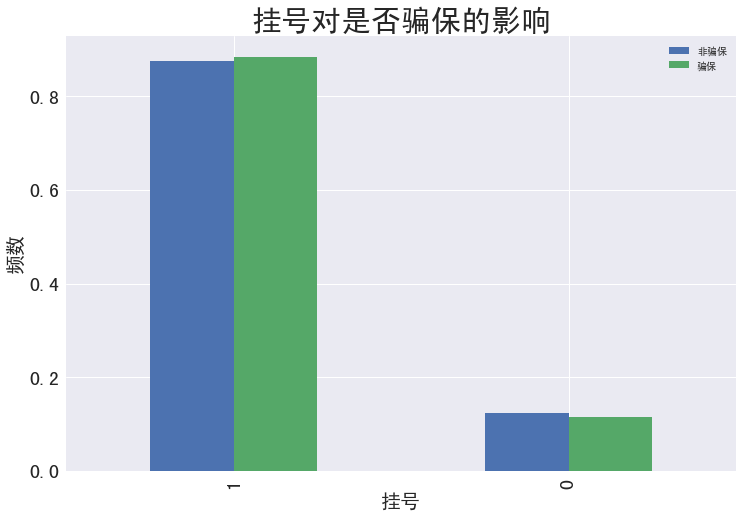

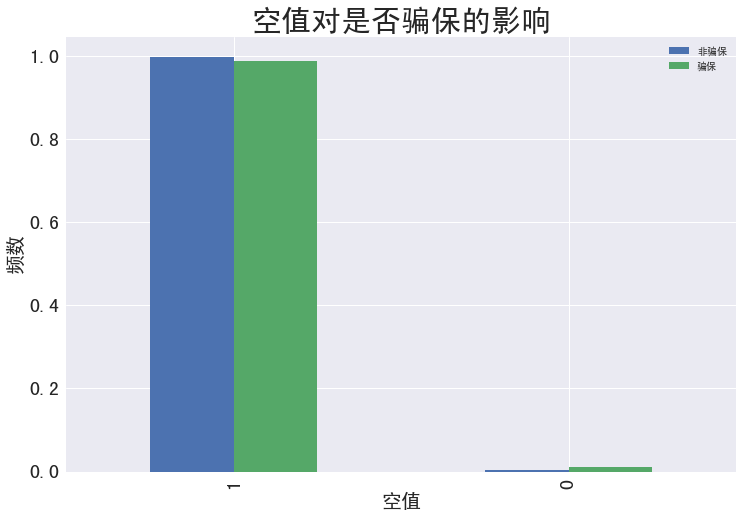

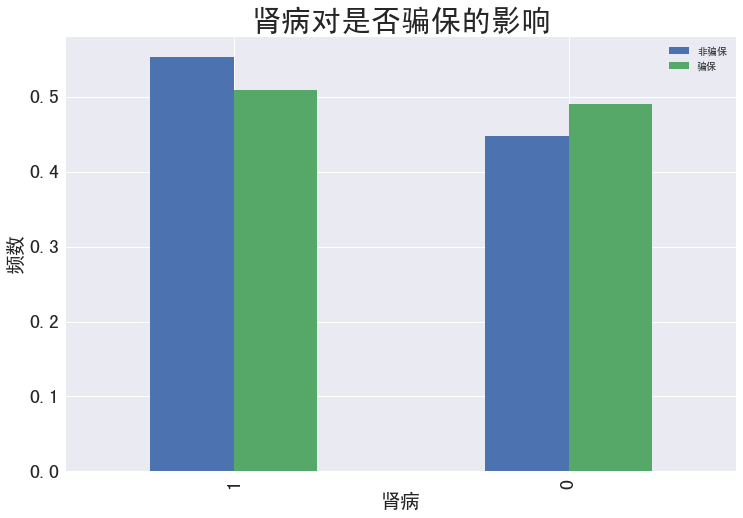

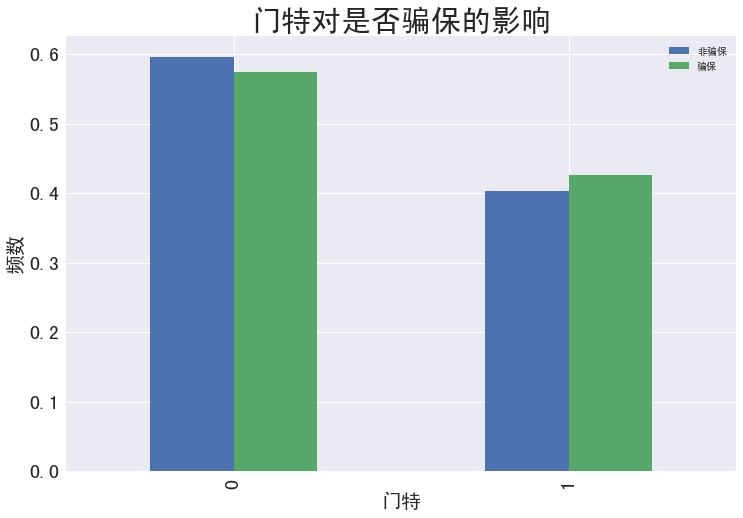

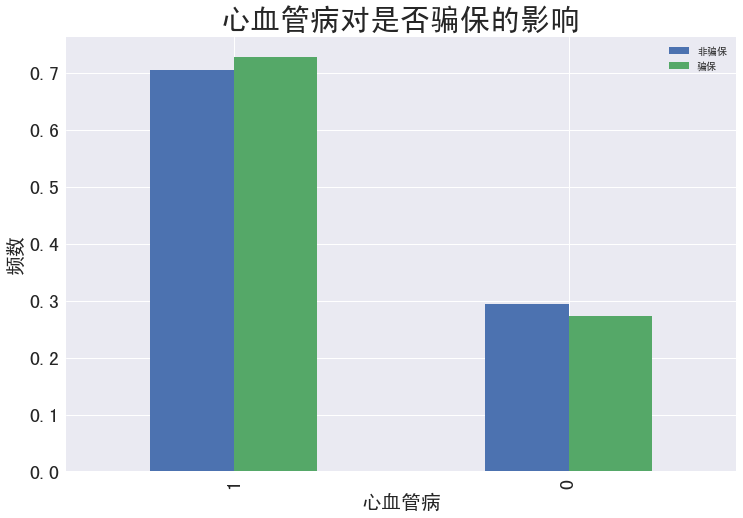

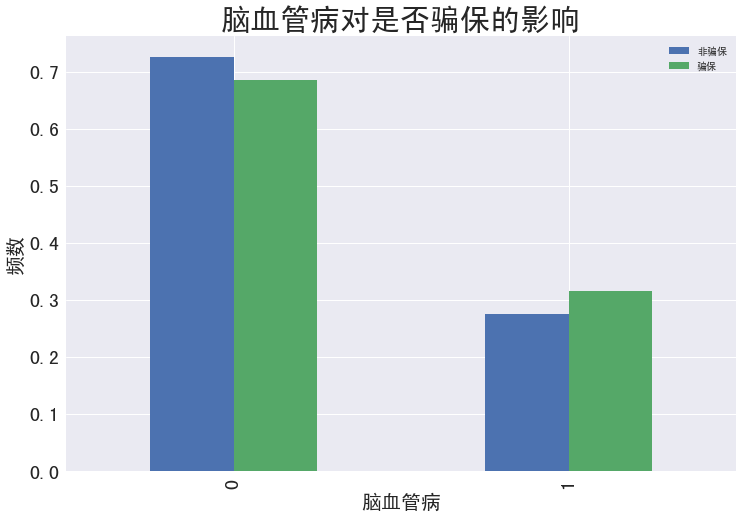

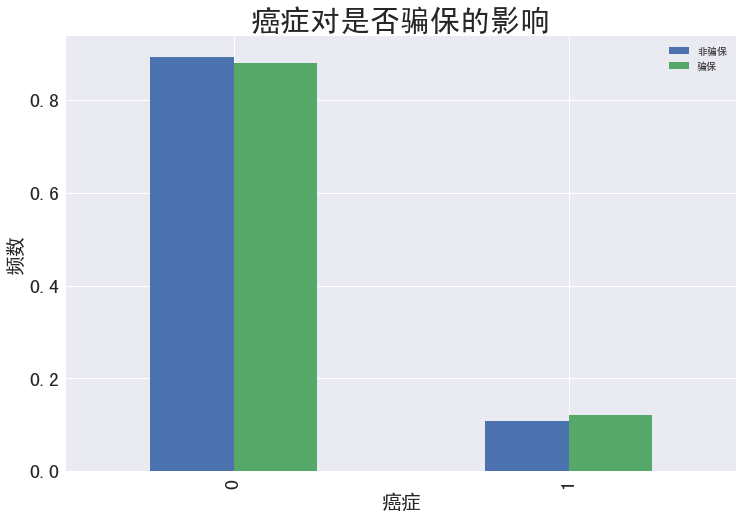

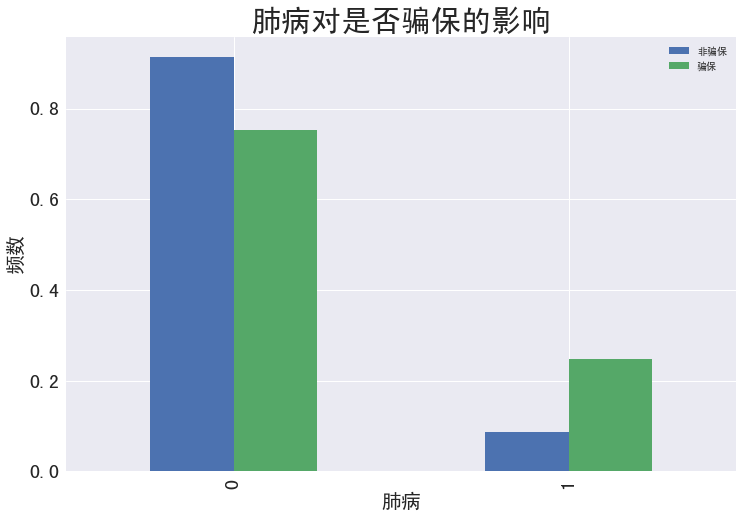

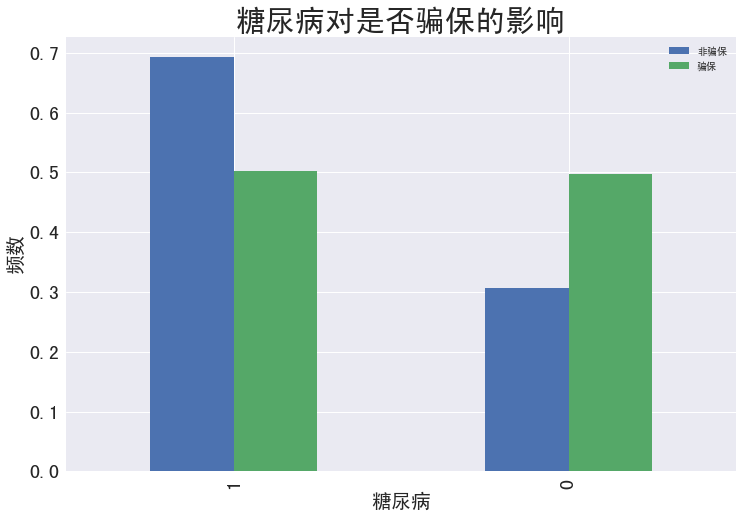

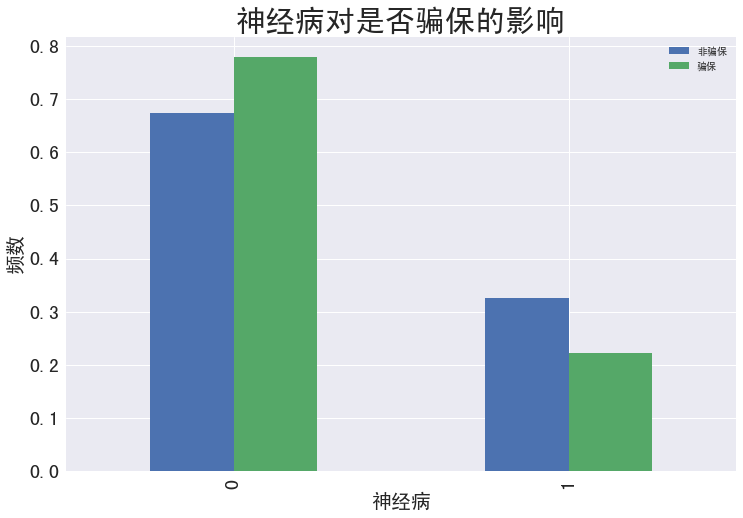

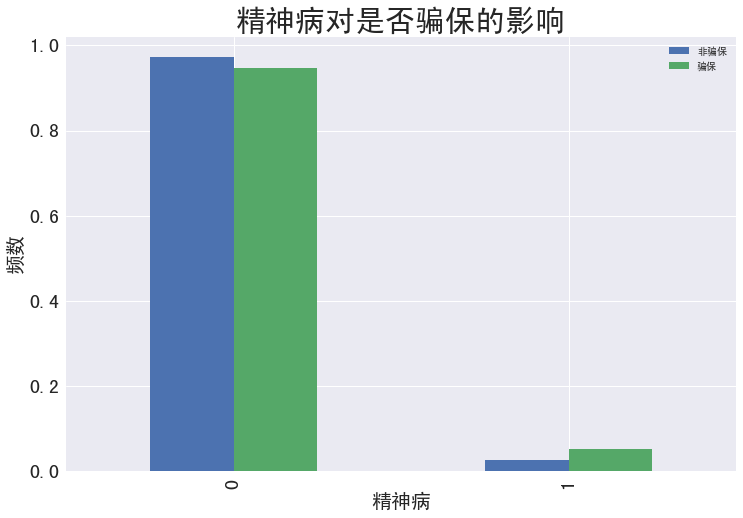

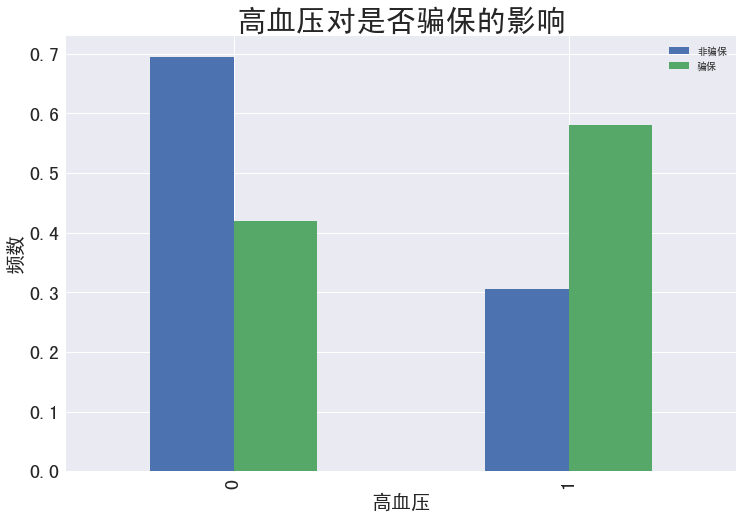

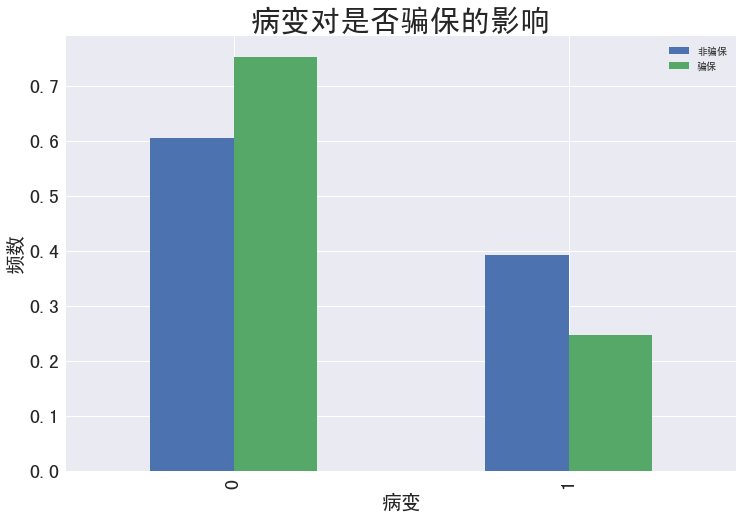

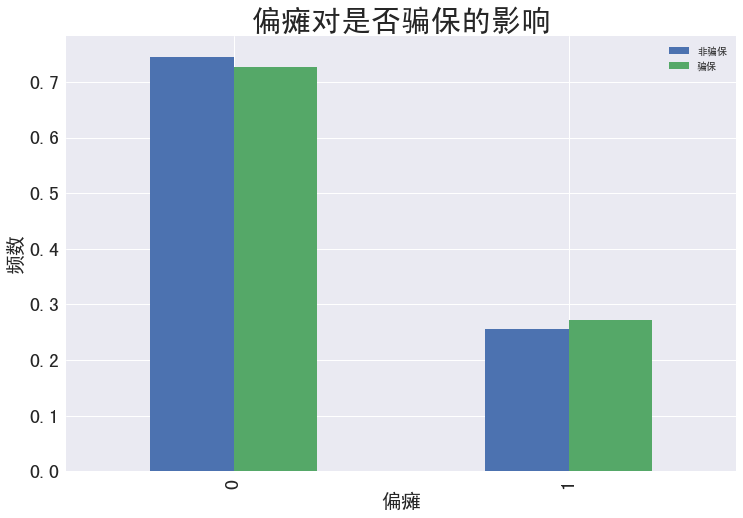

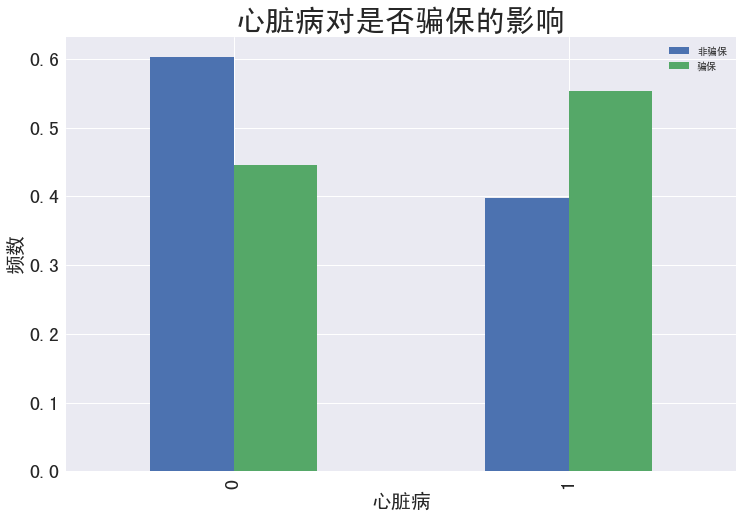

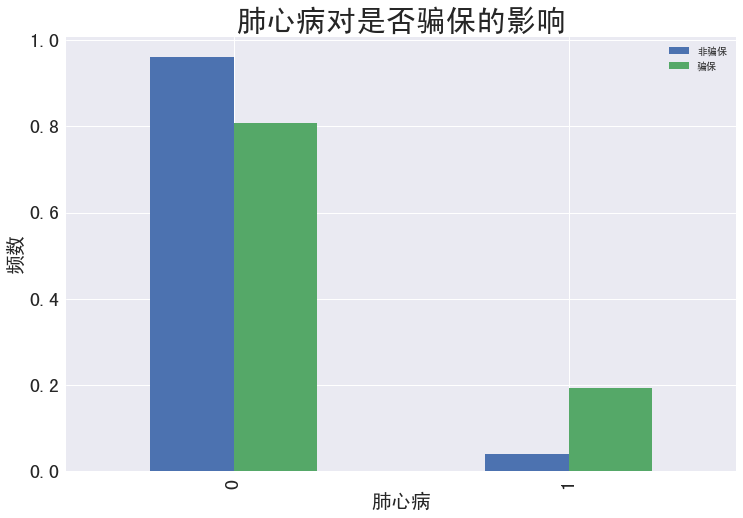

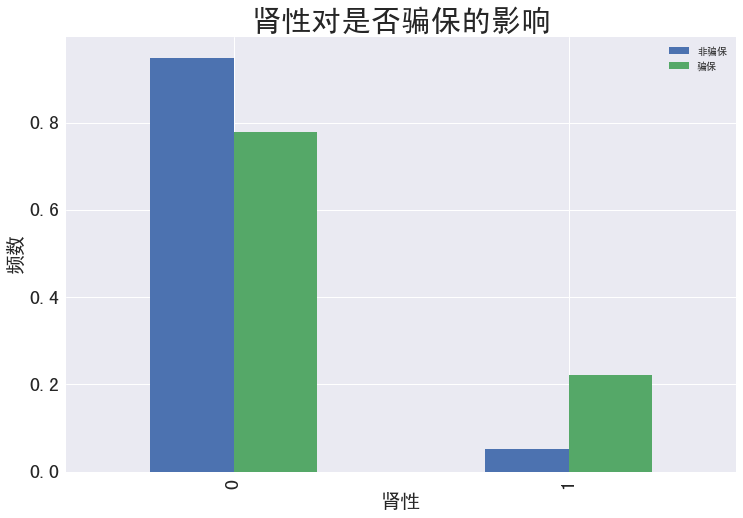

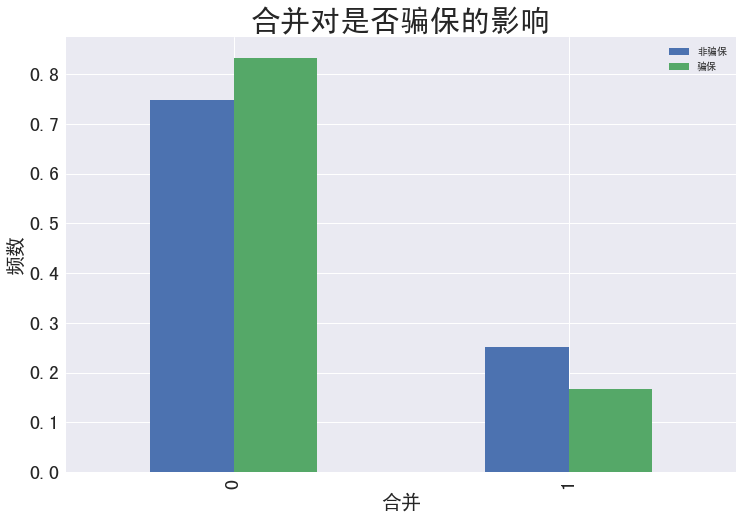

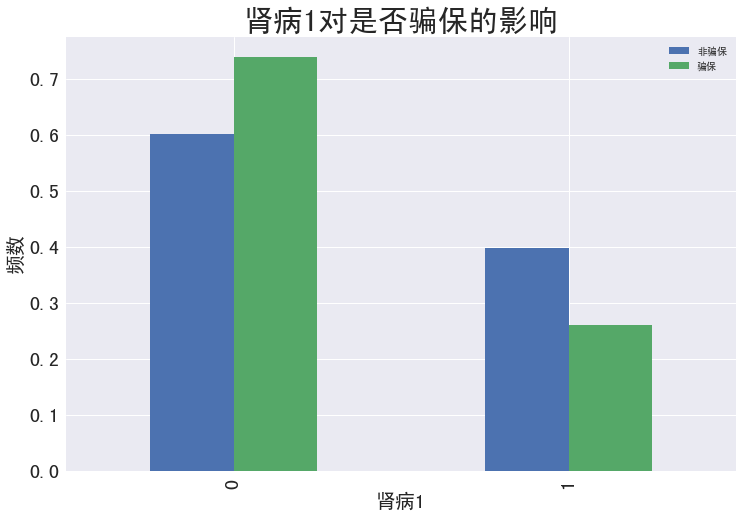

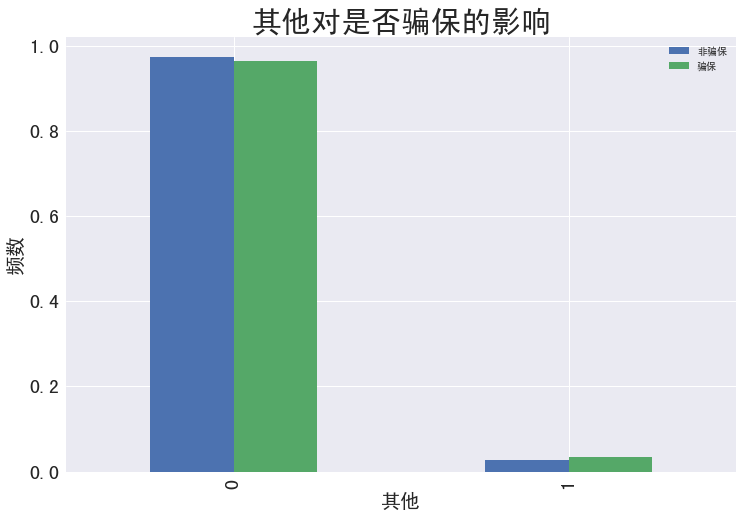

In [23]:
for column in ['挂号','空值','肾病','门特','心血管病','脑血管病','癌症','肺病'
                ,'糖尿病','神经病','精神病','高血压','病变','偏瘫','心脏病','肺心病','肾性','合并','肾病1','其他']:
    plot_stack_bar(column,diease_name_new)

# 统计出院病种的字符长度对是否骗保的影响

In [25]:
#计算字符长度
diease_name['字符长度'] = diease_name['出院诊断病种名称'].map(len)

In [32]:
diease_len = diease_name.groupby('个人编码')['标签','字符长度'].max()

/home/zhh/anaconda3/lib/python3.6/site-packages/pandas/tools/plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


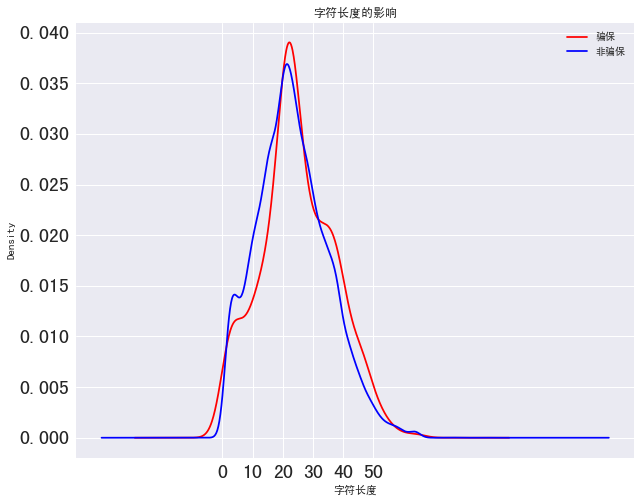

In [37]:
fig,ax = plt.subplots(figsize = (10,8))

diease_len[diease_len['标签']==1]['字符长度'].plot('kde',ax=ax,colors = 'r',label = '骗保')
diease_len[diease_len['标签']==0]['字符长度'].plot('kde',ax=ax,colors = 'b',label = '非骗保')
ax.xaxis.set_ticks(np.arange(0,60,10))
ax.set_title('字符长度的影响')
ax.set_xlabel("字符长度")
ax.legend()

# 结论：出院病种的字符长度对是否骗保没有影响！！！！！
-----

# 研究一个拥有病种的种数对是否骗保的影响

In [54]:
#统计病种的总类数
diease_type_cnt = diease_name_new[['挂号','空值','肾病','门特','心血管病','脑血管病','癌症','肺病'
                ,'糖尿病','神经病','精神病','高血压','病变','偏瘫','心脏病',
                 '肺心病','肾性','合并','肾病1','其他']].sum(axis=1)
diease_name_new1 = diease_name_new.copy()
diease_name_new1['所患病种类数'] = diease_type_cnt

/home/zhh/anaconda3/lib/python3.6/site-packages/pandas/tools/plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


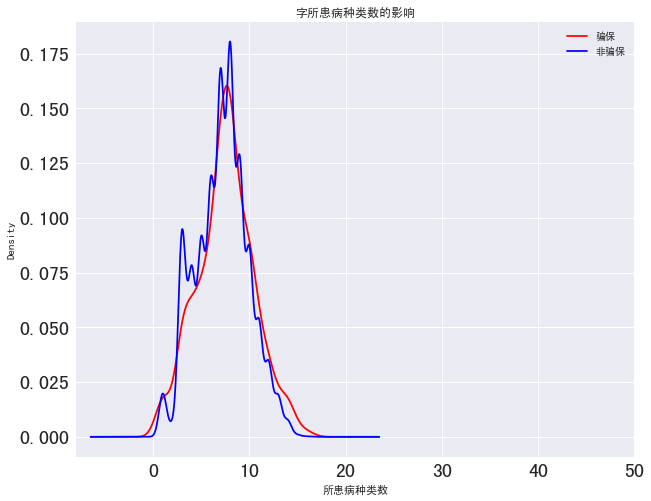

In [56]:
fig,ax = plt.subplots(figsize = (10,8))

diease_name_new1[diease_name_new1['标签']==1]['所患病种类数'].plot('kde',ax=ax,colors = 'r',label = '骗保')
diease_name_new1[diease_name_new1['标签']==0]['所患病种类数'].plot('kde',ax=ax,colors = 'b',label = '非骗保')
ax.xaxis.set_ticks(np.arange(0,60,10))
ax.set_title('字所患病种类数的影响')
ax.set_xlabel("所患病种类数")
ax.legend()

# 结论： 拥有病种的种数对是否骗保 结果不影响！！
------


# 最后的结果

In [17]:
diease_name_result = diease_name_new0.groupby('个人编码').sum().reset_index(inplace = False)

In [19]:
if os.path.exists('/home/zhh/文档/阿里巴巴/data/6.合表'):
    os.chdir('/home/zhh/文档/阿里巴巴/data/6.合表')
else:
    os.mkdir('/home/zhh/文档/阿里巴巴/data/6.合表')
    os.chdir('/home/zhh/文档/阿里巴巴/data/6.合表')
with open('出院诊断病种分词将结果.pickle','wb') as f1:
    #data = pickle.load(f1)  
    pickle.dump(diease_name_result,f1)



In [20]:
diease_name_result

,个人编码,挂号,空值,肾病,门特,心血管病,脑血管病,癌症,肺病,糖尿病,...,高血压,病变,偏瘫,心脏病,肺心病,肾性,合并,肾病1,其他,标签
0,352120000000231,0,1,0,1,3,1,0,0,2,...,1,1,1,2,0,0,2,0,0,0
1,352120000000386,1,1,0,0,2,0,0,2,0,...,0,0,0,2,1,0,0,0,0,0
2,352120000000408,1,1,0,2,1,2,0,0,0,...,1,0,2,0,0,0,0,0,0,0
3,352120000000409,0,1,0,1,1,4,0,0,0,...,2,0,4,0,0,0,0,0,0,0
4,352120000000511,1,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,352120000000674,1,1,3,1,1,0,0,0,5,...,0,0,0,1,0,0,0,3,1,0
6,352120000001361,1,1,2,0,6,0,1,0,7,...,0,2,0,0,0,0,0,2,0,0
7,352120000001462,1,1,1,0,2,0,1,0,3,...,0,0,0,0,0,0,0,1,0,0
8,352120000001641,1,1,1,0,5,0,0,0,7,...,0,3,0,0,0,0,0,1,0,0
9,352120000001710,1,1,1,0,1,0,1,0,2,...,0,1,0,0,0,0,0,0,0,0
